In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# if getting error, please mute the three lines below
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.figsize'] =  (8, 6)

C:\Users\Petrb\AppData\Local\Temp\ipykernel_46488\2570877839.py:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


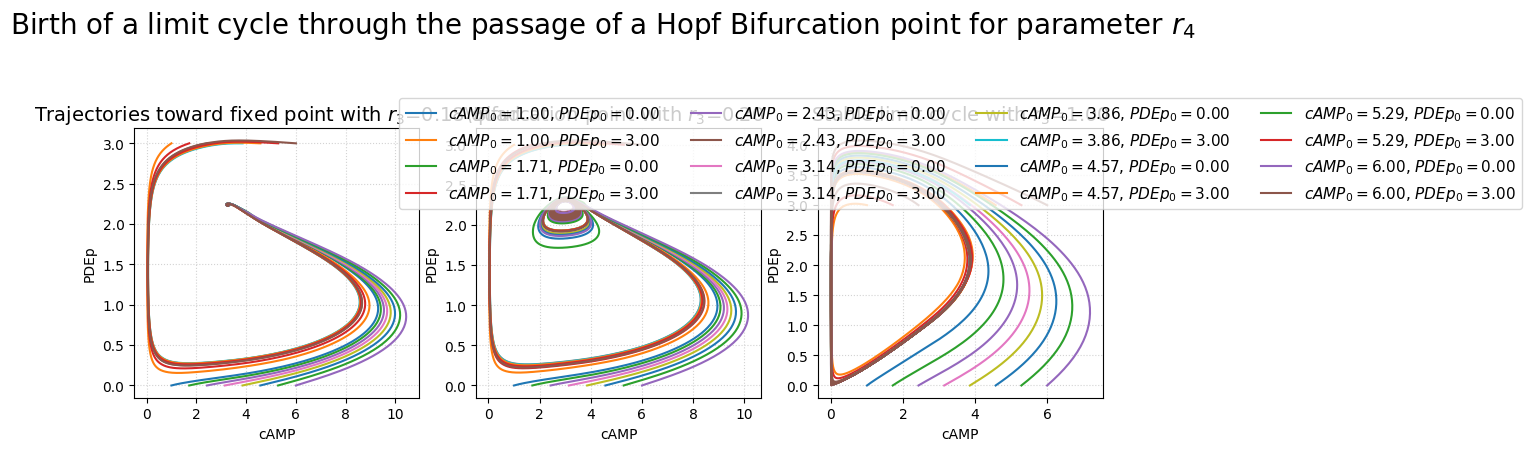

In [1]:
def G(u, v, J, K):
    numerator = 2 * u * K
    den_1 = v - u + v * J + u * K
    den_2 = -4 * (v - u) * u * K
    radicand = den_1**2 + den_2
    denominator = den_1 + np.sqrt(radicand)
    return numerator / denominator

def cAMP_PDEp_ACp(t, x, param):
    cAMP = x[0]
    PDEp = x[1]

    ACp = ACt*G(r1*cAMP, r2*Dt, Km1/ACt, Km2/ACt)
    dPDEp  = param * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)
    dcAMP = (k1*ACp) - (k3 + k2 * PDEp) * cAMP

    return [dcAMP, dPDEp]

k = 1

k1, k3, k2 = 9.18/k, 0.12/k, 10
r1, r2, r4 = 2.04/k, 9.34/k, 1.84/k
Km1, Km2, Km3, Km4 = 0.46, 9.34, 1.26, 0.18
Dt, ACt =  1.26, 10
PDEt, Et = 9.66, 2.04

a, b = 0, 10
t = np.linspace(a, b, 5000)
params = [0.18, 0.1978519785197852, 1]

fig, axs = plt.subplots(1, len(params), figsize=(12.5, 3.5))

for index, param in enumerate(params):
    cAMP_values = np.linspace(1, 6, 8)
    PDEp_values = [0, 3]

    for i, cAMP_0 in enumerate(cAMP_values):
        for j, PDEp_0 in enumerate(PDEp_values):
            sol = solve_ivp(lambda t, x: cAMP_PDEp_ACp(t, x, param), [a, b], [cAMP_0, PDEp_0], t_eval=t)
            axs[index].plot(sol.y[0], sol.y[1], "-", label=rf"$cAMP_0={cAMP_0:.2f}$, $PDEp_0={PDEp_0:.2f}$")

    axs[0].set_title(rf'Trajectories toward fixed point with $r_3$={params[0]:.2f}\quad', fontsize=14)
    axs[1].set_title(rf'Bifurcation point with $r_3$={params[1]:.2f}', fontsize=14)
    axs[2].set_title(rf'Stable limit cycle with $r_3$={params[2]:.2f}', fontsize=14)
    #axs[idx].set_aspect('equal')
    axs[index].grid(True, linestyle=':', color='lightgray')
    axs[index].set_xlabel('cAMP')
    axs[index].set_ylabel('PDEp')
    axs[index].grid(True)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=4, fontsize=11)
plt.suptitle(r'Birth of a limit cycle through the passage of a Hopf Bifurcation point for parameter $r_4$', fontsize=20, y=1.22)
plt.tight_layout()
plt.savefig('limit_cycles_r4.png', dpi=300, bbox_inches='tight')
plt.show()